In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [10]:
img.size

(768, 1024)

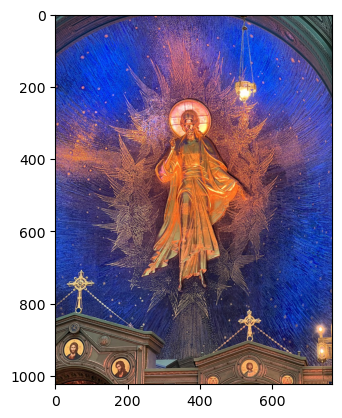

In [22]:
img = Image.open('image.jpeg')
plt.imshow(img)

In [28]:
img_np = np.array(img.convert('RGB'))

In [31]:
img_np = img_np / 255.0

In [36]:
img_sum = img_np.sum(axis=2)
img_bw = img_sum / img_sum.max()

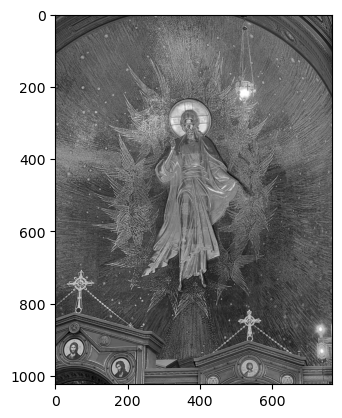

In [45]:
plt.imshow(img_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 371


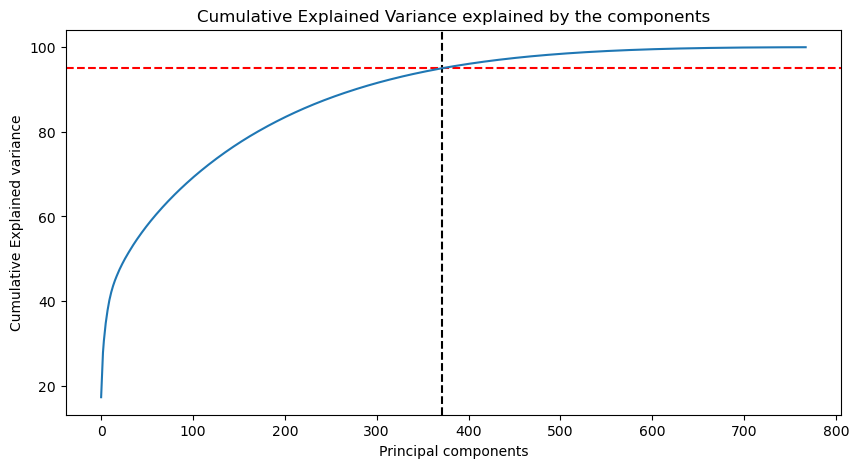

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(img_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [53]:
img_pca = pca.inverse_transform(pca.fit_transform(img_bw))

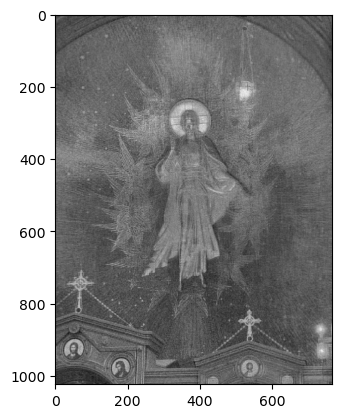

In [54]:
plt.imshow(img_pca, cmap=plt.cm.gray)

In [55]:
img_pca.shape

(1024, 768)